In [2]:
import pandas as pd
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# cross validation 
from sklearn.cross_validation import train_test_split, KFold, cross_val_score

# hyper-parameter tuning
from sklearn.grid_search import GridSearchCV

# preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, OneHotEncoder

# linear models
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet

# non-linear models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# ensemble models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor

# pipeline
from sklearn.pipeline import Pipeline

# metrics for regression problem (mean square error and coefficient of determination)
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
train = pd.read_csv('/Users/johannes/Downloads/Advanced Housing/house/train.csv')
test = pd.read_csv('/Users/johannes/Downloads/Advanced Housing/house/test.csv')

In [4]:
pd.set_option('precision', 1)
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [6]:
print 'Shape of the train data:', train.shape
print 'Shape of the test data:', test.shape

Shape of the train data: (1460, 81)
Shape of the test data: (1459, 80)


In [7]:
# datatypes for train and test data
print 'Train datatypes:'
print train.dtypes
print ''
print 'Tests datatypes:'
print test.dtypes

Train datatypes:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYr

In [8]:
pd.set_option('precision', 2)
print 'Train correlation:'
print train.corr(method='pearson')
print ''
print 'Test correlation:'
print test.corr(method='pearson')

Train correlation:
                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.00e+00    1.12e-02    -1.06e-02 -3.32e-02        -0.03   
MSSubClass     1.12e-02    1.00e+00    -3.86e-01 -1.40e-01         0.03   
LotFrontage   -1.06e-02   -3.86e-01     1.00e+00  4.26e-01         0.25   
LotArea       -3.32e-02   -1.40e-01     4.26e-01  1.00e+00         0.11   
OverallQual   -2.84e-02    3.26e-02     2.52e-01  1.06e-01         1.00   
OverallCond    1.26e-02   -5.93e-02    -5.92e-02 -5.64e-03        -0.09   
YearBuilt     -1.27e-02    2.79e-02     1.23e-01  1.42e-02         0.57   
YearRemodAdd  -2.20e-02    4.06e-02     8.89e-02  1.38e-02         0.55   
MasVnrArea    -5.03e-02    2.29e-02     1.93e-01  1.04e-01         0.41   
BsmtFinSF1    -5.02e-03   -6.98e-02     2.34e-01  2.14e-01         0.24   
BsmtFinSF2    -5.97e-03   -6.56e-02     4.99e-02  1.11e-01        -0.06   
BsmtUnfSF     -7.94e-03   -1.41e-01     1.33e-01 -2.62e-03         0.31   
TotalB

# Data visualization for train dataset

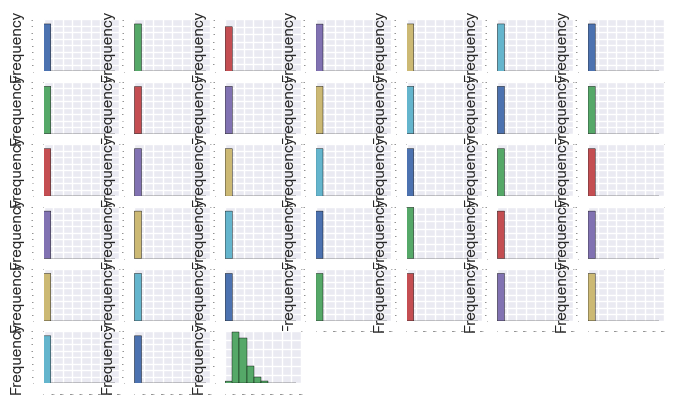

In [9]:
# unimodel analysis
train.plot(kind='hist', subplots=True, layout=(7, 7), sharex=False, legend=False, fontsize=1)
plt.show()

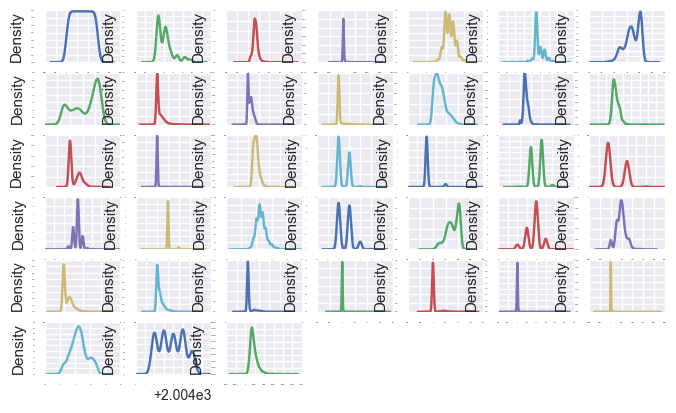

In [10]:
# density
train.plot(kind='density', subplots=True, layout=(7, 7), sharex=False, legend=False, fontsize=1)
plt.show()

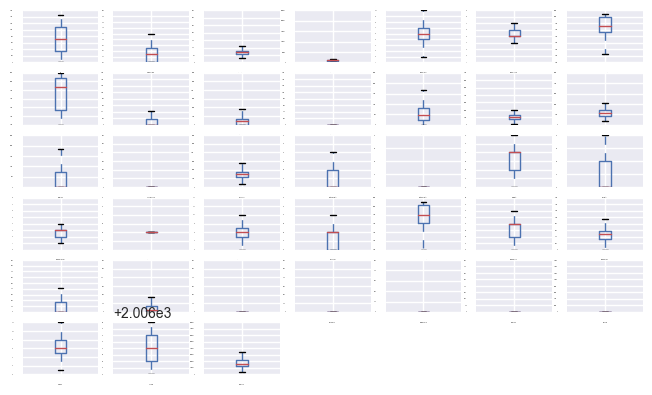

In [11]:
# box plot
train.plot(kind='box', subplots=True, layout=(7, 7), sharex=False, legend=False, fontsize=1)
plt.show()

# Multimodal Analysis

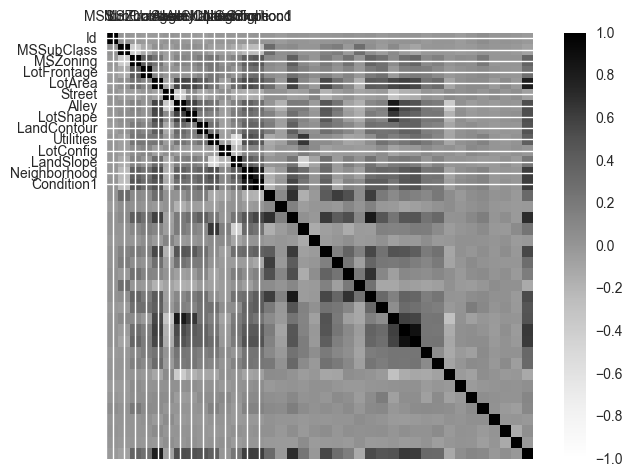

In [12]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(train.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax)
ticks = np.arange(0,14,1)

names = train.columns

ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

# Convert output via natural logarithm

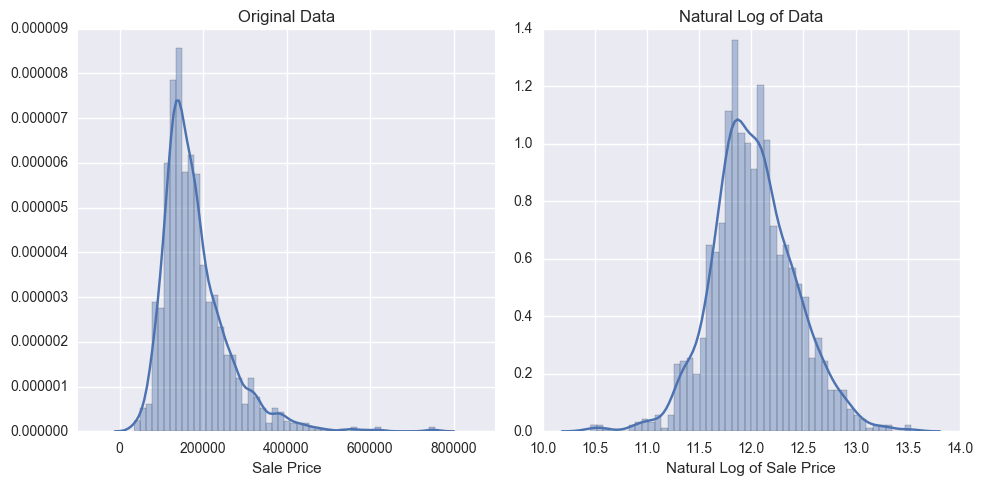

In [13]:
# use natural log to convert the output, ie ln(1000) and exponential to convert it back!
output = train[train.columns.values[-1]]
output_log = np.log(output)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(output, bins=50)
plt.title('Original Data')
plt.xlabel('Sale Price')

plt.subplot(1,2,2)
sns.distplot(output_log, bins=50)
plt.title('Natural Log of Data')
plt.xlabel('Natural Log of Sale Price')
plt.tight_layout()

In [14]:
print output_log
# print output

0       12.25
1       12.11
2       12.32
3       11.85
4       12.43
5       11.87
6       12.63
7       12.21
8       11.77
9       11.68
10      11.77
11      12.75
12      11.88
13      12.54
14      11.96
15      11.79
16      11.91
17      11.41
18      11.98
19      11.84
20      12.69
21      11.85
22      12.35
23      11.77
24      11.94
25      12.45
26      11.81
27      12.63
28      12.24
29      11.13
        ...  
1430    12.17
1431    11.88
1432    11.07
1433    12.14
1434    11.98
1435    12.07
1436    11.70
1437    12.89
1438    11.92
1439    12.19
1440    12.16
1441    11.91
1442    12.64
1443    11.70
1444    12.10
1445    11.77
1446    11.97
1447    12.39
1448    11.63
1449    11.43
1450    11.82
1451    12.57
1452    11.88
1453    11.34
1454    12.13
1455    12.07
1456    12.25
1457    12.49
1458    11.86
1459    11.90
Name: SalePrice, dtype: float64


# Merge training and testing dataset

In [15]:
# drop SalePrice and Id for train dataset
train_feat_dataset = train.drop('SalePrice', 1)
train_feat_dataset = train_feat_dataset.drop('Id', 1)

# drop Id for test dataset
test_feat_dataset = test.drop('Id', 1)

overall_dataset = train_feat_dataset.append(test_feat_dataset, ignore_index = True)

In [16]:
train_feat_dataset.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


In [17]:
test_feat_dataset.tail(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [18]:
overall_dataset.tail(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [19]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
alphabetical = ['object']

numeric_dataset = overall_dataset.select_dtypes(include=numerics)
alphabetical_dataset = overall_dataset.select_dtypes(include=alphabetical)

print 'Shape of numeric dataset:', numeric_dataset.shape
print 'Shape of alphabetical dataset:', alphabetical_dataset.shape

Shape of numeric dataset: (2919, 36)
Shape of alphabetical dataset: (2919, 43)


# Handle Missing Continuous Data

In [20]:
# print the skewnewss of the numeric data
numeric_dataset.skew()

MSSubClass        1.38
LotFrontage       1.50
LotArea          12.83
OverallQual       0.20
OverallCond       0.57
YearBuilt        -0.60
YearRemodAdd     -0.45
MasVnrArea        2.60
BsmtFinSF1        1.43
BsmtFinSF2        4.15
BsmtUnfSF         0.92
TotalBsmtSF       1.16
1stFlrSF          1.47
2ndFlrSF          0.86
LowQualFinSF     12.09
GrLivArea         1.27
BsmtFullBath      0.62
BsmtHalfBath      3.93
FullBath          0.17
HalfBath          0.69
BedroomAbvGr      0.33
KitchenAbvGr      4.30
TotRmsAbvGrd      0.76
Fireplaces        0.73
GarageYrBlt      -0.38
GarageCars       -0.22
GarageArea        0.24
WoodDeckSF        1.84
OpenPorchSF       2.54
EnclosedPorch     4.01
3SsnPorch        11.38
ScreenPorch       3.95
PoolArea         16.91
MiscVal          21.96
MoSold            0.20
YrSold            0.13
dtype: float64

In [21]:
def is_outlier(points, thresh = 3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

# Pre-process data

In [22]:
norm = Normalizer()
label_enc = LabelEncoder()

In [23]:
# If any column contains fewer that 50 entries of missing data, 
# replace those missing values with the median for that column
# Remove outliers using Median Absolute Deviation
# Calculate skewness for each variable and if greater than 0.75 transform it
# Apply the sklearn.Normalizer to each column

for i in numeric_dataset.columns.values:
#     # if any column contains more than 50 entries of missing data, drop the column
    if np.sum(numeric_dataset[i].isnull()) > 50:
        numeric_dataset = numeric_dataset.drop(i, axis = 1)
    # If any column contains fewer that 50 entries of missing data, 
    # replace those missing values with the median for that column
    elif np.sum(numeric_dataset[i].isnull()) > 0:
        # compute median
        median = numeric_dataset[i].median()
        # obtain the index
        idx = np.where(numeric_dataset[i].isnull())[0]
        # replace NaN data with median value
        numeric_dataset[i].iloc[idx] = median
        # obtain outliers
        outliers = np.where(is_outlier(numeric_dataset[i]))
        # replace outliers with median value
        numeric_dataset[i].iloc[outliers] = median

        # if the skew is more than 0.75, perform natural log on it
        if sc.stats.skew(numeric_dataset[i]) > 0.75:
            numeric_dataset[i] = np.log(numeric_dataset[i])
            numeric_dataset[i] = numeric_dataset[i].apply(lambda x: 0 if x == -np.inf else x)

        # normalize the data
        numeric_dataset[i] = norm.fit_transform(numeric_dataset[i].reshape(1,-1))[0]

/Users/johannes/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Handle Missing Categorical Data

In [24]:
# Apply the sklearn.LabelEncoder
# For each categorical variable determine the number of unique values and for each, 
# one hot encoding is performed

for i in alphabetical_dataset.columns.values:
    # if any column contains more than 50 entries of missing data, drop the column
    if np.sum(alphabetical_dataset[i].isnull()) > 50:
        alphabetical_dataset = alphabetical_dataset.drop(i, axis = 1)
        continue
    # if any column contains fewer that 50 entries of missing data, replace those values with the 'MIA'
    elif np.sum(alphabetical_dataset[i].isnull()) > 0:
        alphabetical_dataset[i] = alphabetical_dataset[i].fillna('MIA')

    alphabetical_dataset[i] = label_enc.fit_transform(alphabetical_dataset[i])

    num_cols = alphabetical_dataset[i].max()

    for j in range(num_cols):
        col_name = i + '_' + str(j)
        alphabetical_dataset[col_name] = alphabetical_dataset[i].apply(lambda x: 1 if x == j else 0)

    alphabetical_dataset = alphabetical_dataset.drop(i, axis = 1)

/Users/johannes/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/johannes/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/johannes/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [25]:
# double check for missing data
print 'Missing Numerical Data:'
print np.sum(numeric_dataset.isnull())
print ''
print 'Missing Alphabetical Data:'
print np.sum(alphabetical_dataset.isnull())

Missing Numerical Data:
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

Missing Alphabetical Data:
MSZoning_0         0
MSZoning_1         0
MSZoning_2         0
MSZoning_3         0
MSZoning_4         0
Street_0           0
LotShape_0         0
LotShape_1         0
LotShape_2         0
LandContour_0      0
LandContour_1      0
LandContour_2      0
Utilities_0        0
Utilities_1     

In [26]:
combined_dataset = numeric_dataset.join(alphabetical_dataset)

preprocessed_train = combined_dataset[0: train.shape[0]]
preprocessed_train = preprocessed_train.join(output_log)

preprocessed_test = combined_dataset[train.shape[0]:]

In [27]:
preprocessed_train.shape

(1460, 206)

In [28]:
preprocessed_train.head(3)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SalePrice
0,60,8450,7,5,2003,2003,0.0,0.02,0.0,0.02,...,0,0,0,0,0,0,0,0,1,12.25
1,20,9600,6,8,1976,1976,0.0,0.02,0.0,0.02,...,0,0,0,0,0,0,0,0,1,12.11
2,60,11250,7,5,2001,2002,0.0,0.02,0.0,0.02,...,0,0,0,0,0,0,0,0,1,12.32


In [29]:
preprocessed_test.head(3)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
1460,20,11622,5,6,1961,1961,0.0,0.02,0.0,0.02,...,0,0,0,0,0,0,0,0,0,1
1461,20,14267,6,6,1958,1958,0.0,0.02,0.0,0.02,...,0,0,0,0,0,0,0,0,0,1
1462,60,13830,5,5,1997,1998,0.0,0.02,0.0,0.02,...,0,0,0,0,0,0,0,0,0,1


In [30]:
train_array = preprocessed_train.values

X_train = train_array[:, 0:-1]
Y_train = train_array[:, -1]

test_array = preprocessed_test.values

X_test = test_array

In [31]:
print 'X_train shape:', X_train.shape
print 'Y_train shape:', Y_train.shape
print 'X test shape:', X_test.shape

X_train shape: (1460, 205)
Y_train shape: (1460,)
X test shape: (1459, 205)


In [32]:
# Test options and evaluation metric
num_folds = 10
scoring = 'mean_squared_error'

# linear and non-linear algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso())) 
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor())) 
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR', SVR()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
  kfold = KFold(X_train.shape[0], 10, random_state=7)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -0.020078 (0.009189)
LASSO: -0.043015 (0.017117)
EN: -0.040060 (0.016521)
KNN: -0.064533 (0.009471)
CART: -0.039006 (0.009390)
SVR: -0.156925 (0.022433)


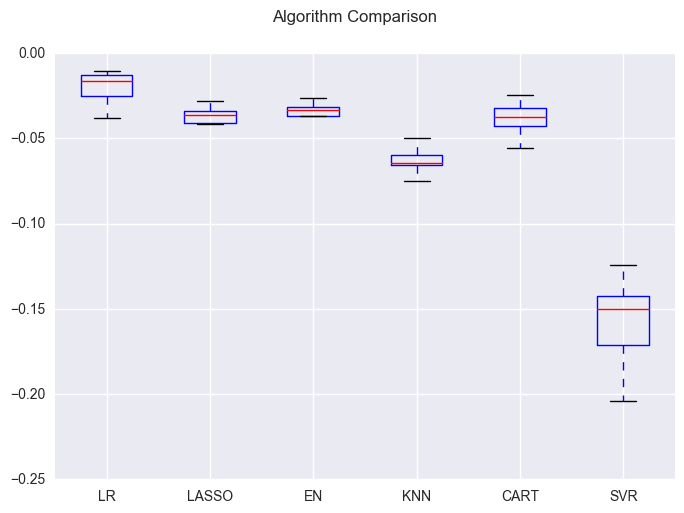

In [33]:
# Compare Algorithms
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [34]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))) 

results = []
names = []

for name, model in pipelines:
  kfold = KFold(X_train.shape[0], 10, random_state=7)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: -3842749830759199744.000000 (9861351085287581696.000000)
ScaledLASSO: -0.159657 (0.022202)
ScaledEN: -0.159657 (0.022202)
ScaledKNN: -0.042700 (0.007943)
ScaledCART: -0.037463 (0.007975)
ScaledSVR: -0.032777 (0.007773)


In [35]:
# ensemble algorithms
models = []
models.append(('RF', RandomForestRegressor())) 
models.append(('GBR', GradientBoostingRegressor())) 
models.append(('ADABR', AdaBoostRegressor())) 
models.append(('EXTR', ExtraTreesRegressor())) 

# evaluate each model in turn
results = []
names = []

for name, model in models:
  kfold = KFold(X_train.shape[0], 10, random_state=7)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

RF: -0.023211 (0.005213)
GBR: -0.016811 (0.005181)
ADABR: -0.031616 (0.005280)
EXTR: -0.021760 (0.004788)


# Hyperparameter tuning via GridSearchCV

In [35]:
# tune gradient boosting regressor
loss_values = ['ls', 'lad', 'huber', 'quantile']
lr_values = [0.1, 0.01, 0.001]
n_values = [100, 200, 300, 400, 500]
max_values = [3, 4, 5, 6]

param_grid = dict(loss=loss_values, 
                  learning_rate=lr_values, 
                  n_estimators=n_values, 
                  max_depth=max_values)

model = GradientBoostingRegressor()

kfold = KFold(X_train.shape[0], 10, random_state=7)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, verbose=0, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/Users/firdause/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/firdause/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/firdause/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes

Best: -0.015180 using {'n_estimators': 400, 'loss': 'huber', 'learning_rate': 0.1, 'max_depth': 3}


# Plot graph of actual vs predicted house price

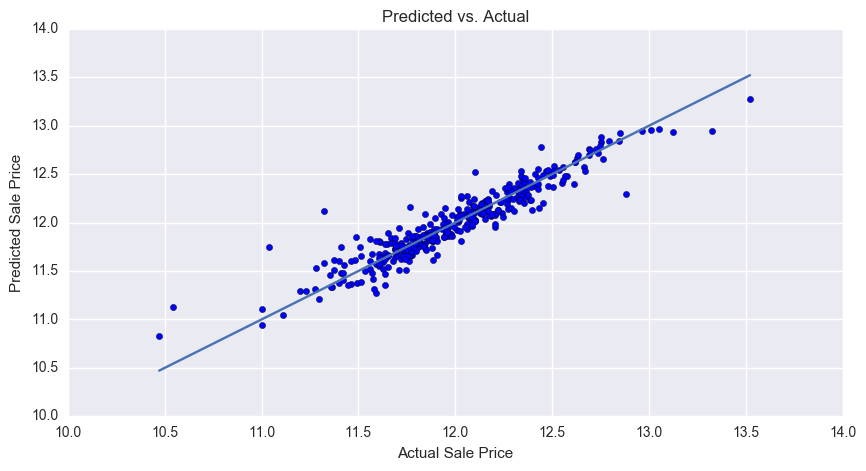

In [36]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_train, Y_train)

clf = GradientBoostingRegressor()
clf.fit(X_train_1, Y_train_1)

Y_pred = clf.predict(X_test_1)

plt.figure(figsize=(10, 5))
plt.scatter(Y_test_1, Y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(Y_test_1), max(Y_test_1)], [min(Y_test_1), max(Y_test_1)])
plt.show()

# Submission to Kaggle

In [38]:
# test_dataset = pd.read_csv('/Users/johannes/Downloads/Advanced Housing/house/test.csv')

# test_data_id = test_dataset['Id']
# actual_prediction = grid_result.predict(X_test)

# exponential_prediction = np.exp(actual_prediction)

# results_dataframe = pd.DataFrame({'Id' : test_data_id,
#                                   'SalePrice': exponential_prediction})

# results_dataframe.to_csv("first_submission.csv", index = False)